In [34]:
#Import the Required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [35]:
#import the data into dataframe

df = pd.read_csv("train.csv",index_col=0)
df.head()

Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight   
id                                                                            
0    I  1.5250    1.1750  0.3750  28.973189       12.728926        6.647958  \
1    I  1.1000    0.8250  0.2750  10.418441        4.521745        2.324659   
2    M  1.3875    1.1125  0.3750  24.777463       11.339800        5.556502   
3    F  1.7000    1.4125  0.5000  50.660556       20.354941       10.991839   
4    I  1.2500    1.0125  0.3375  23.289114       11.977664        4.507570   

    Shell Weight  Age  
id                     
0       8.348928    9  
1       3.401940    8  
2       6.662133    9  
3      14.996885   11  
4       5.953395    8

## Check Data quality
->check for data shape
->check for null data 
->check for data type 

In [36]:
df.shape

(74051, 9)

<Axes: ylabel='id'>

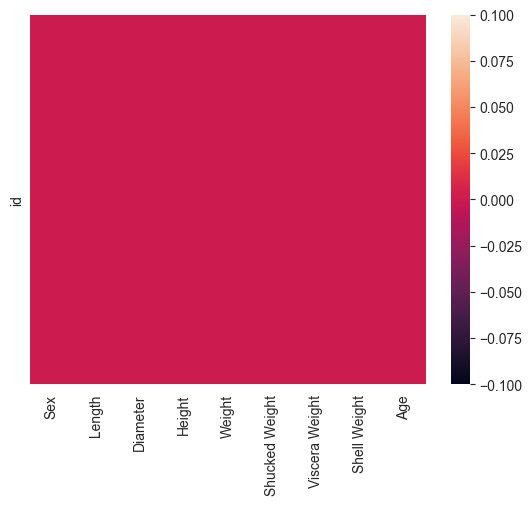

In [37]:
sns.heatmap(df.isnull(),yticklabels=False)

In [38]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

There is no Null value in the Data frame

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [40]:
df['Sex'] = df['Sex'].astype("category")

In [41]:
df.rename(columns={'Shucked Weight':'Shucked_Weight','Viscera Weight':'Viscera_Weight','Shell Weight':'Shell_Weight'},inplace=True)

## Exploratory data analysis (EDA)

In [42]:
df['Sex'].value_counts()

Sex
M    27084
I    23957
F    23010
Name: count, dtype: int64

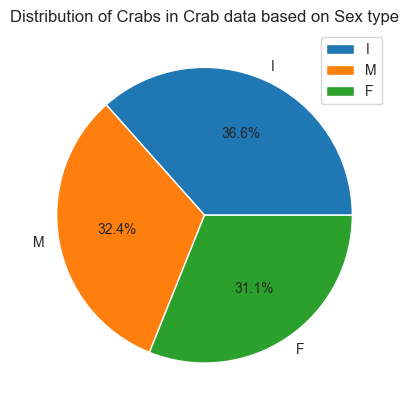

In [43]:
plt.pie(x=df['Sex'].value_counts(),labels=df['Sex'].unique(),autopct='%1.1f%%')
plt.title("Distribution of Crabs in Crab data based on Sex type")
plt.legend()
plt.show()

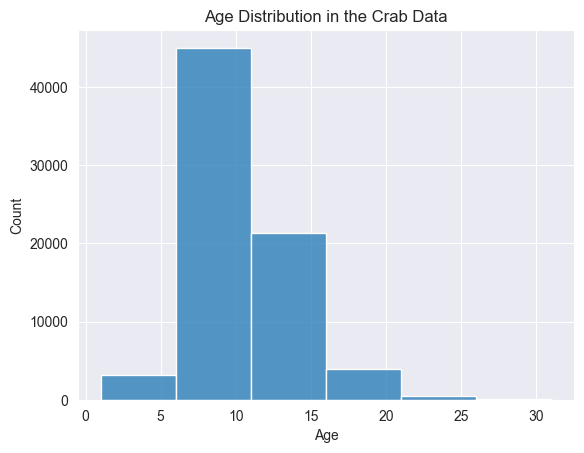

In [51]:
sns.set_style('darkgrid')
sns.histplot(data=df,x='Age',binwidth=5)
plt.title("Age Distribution in the Crab Data")
plt.show()

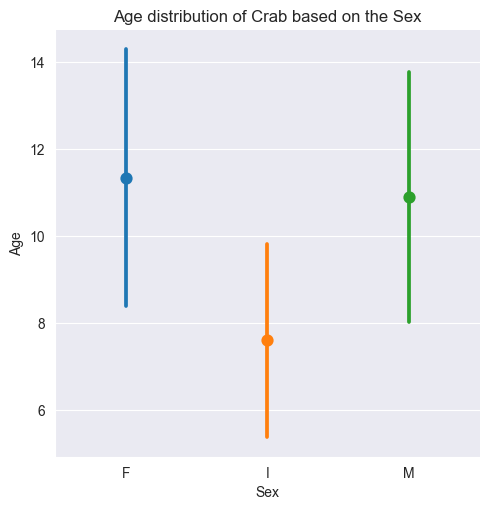

In [52]:
sns.catplot(data=df,x='Sex',y='Age',kind='point',hue='Sex',ci='sd')
plt.title("Age distribution of Crab based on the Sex")
sns.despine()
plt.show()

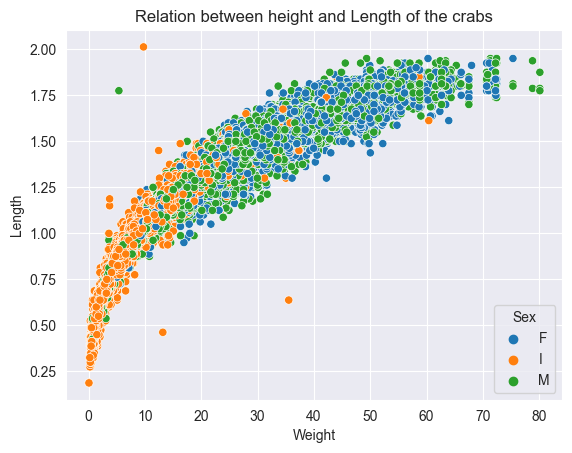

In [57]:
sns.scatterplot(data=df,x='Weight',y='Length',hue='Sex')
plt.title("Relation between height and Length of the crabs")
plt.show()

### Check the relationship between multiple variables in the data set

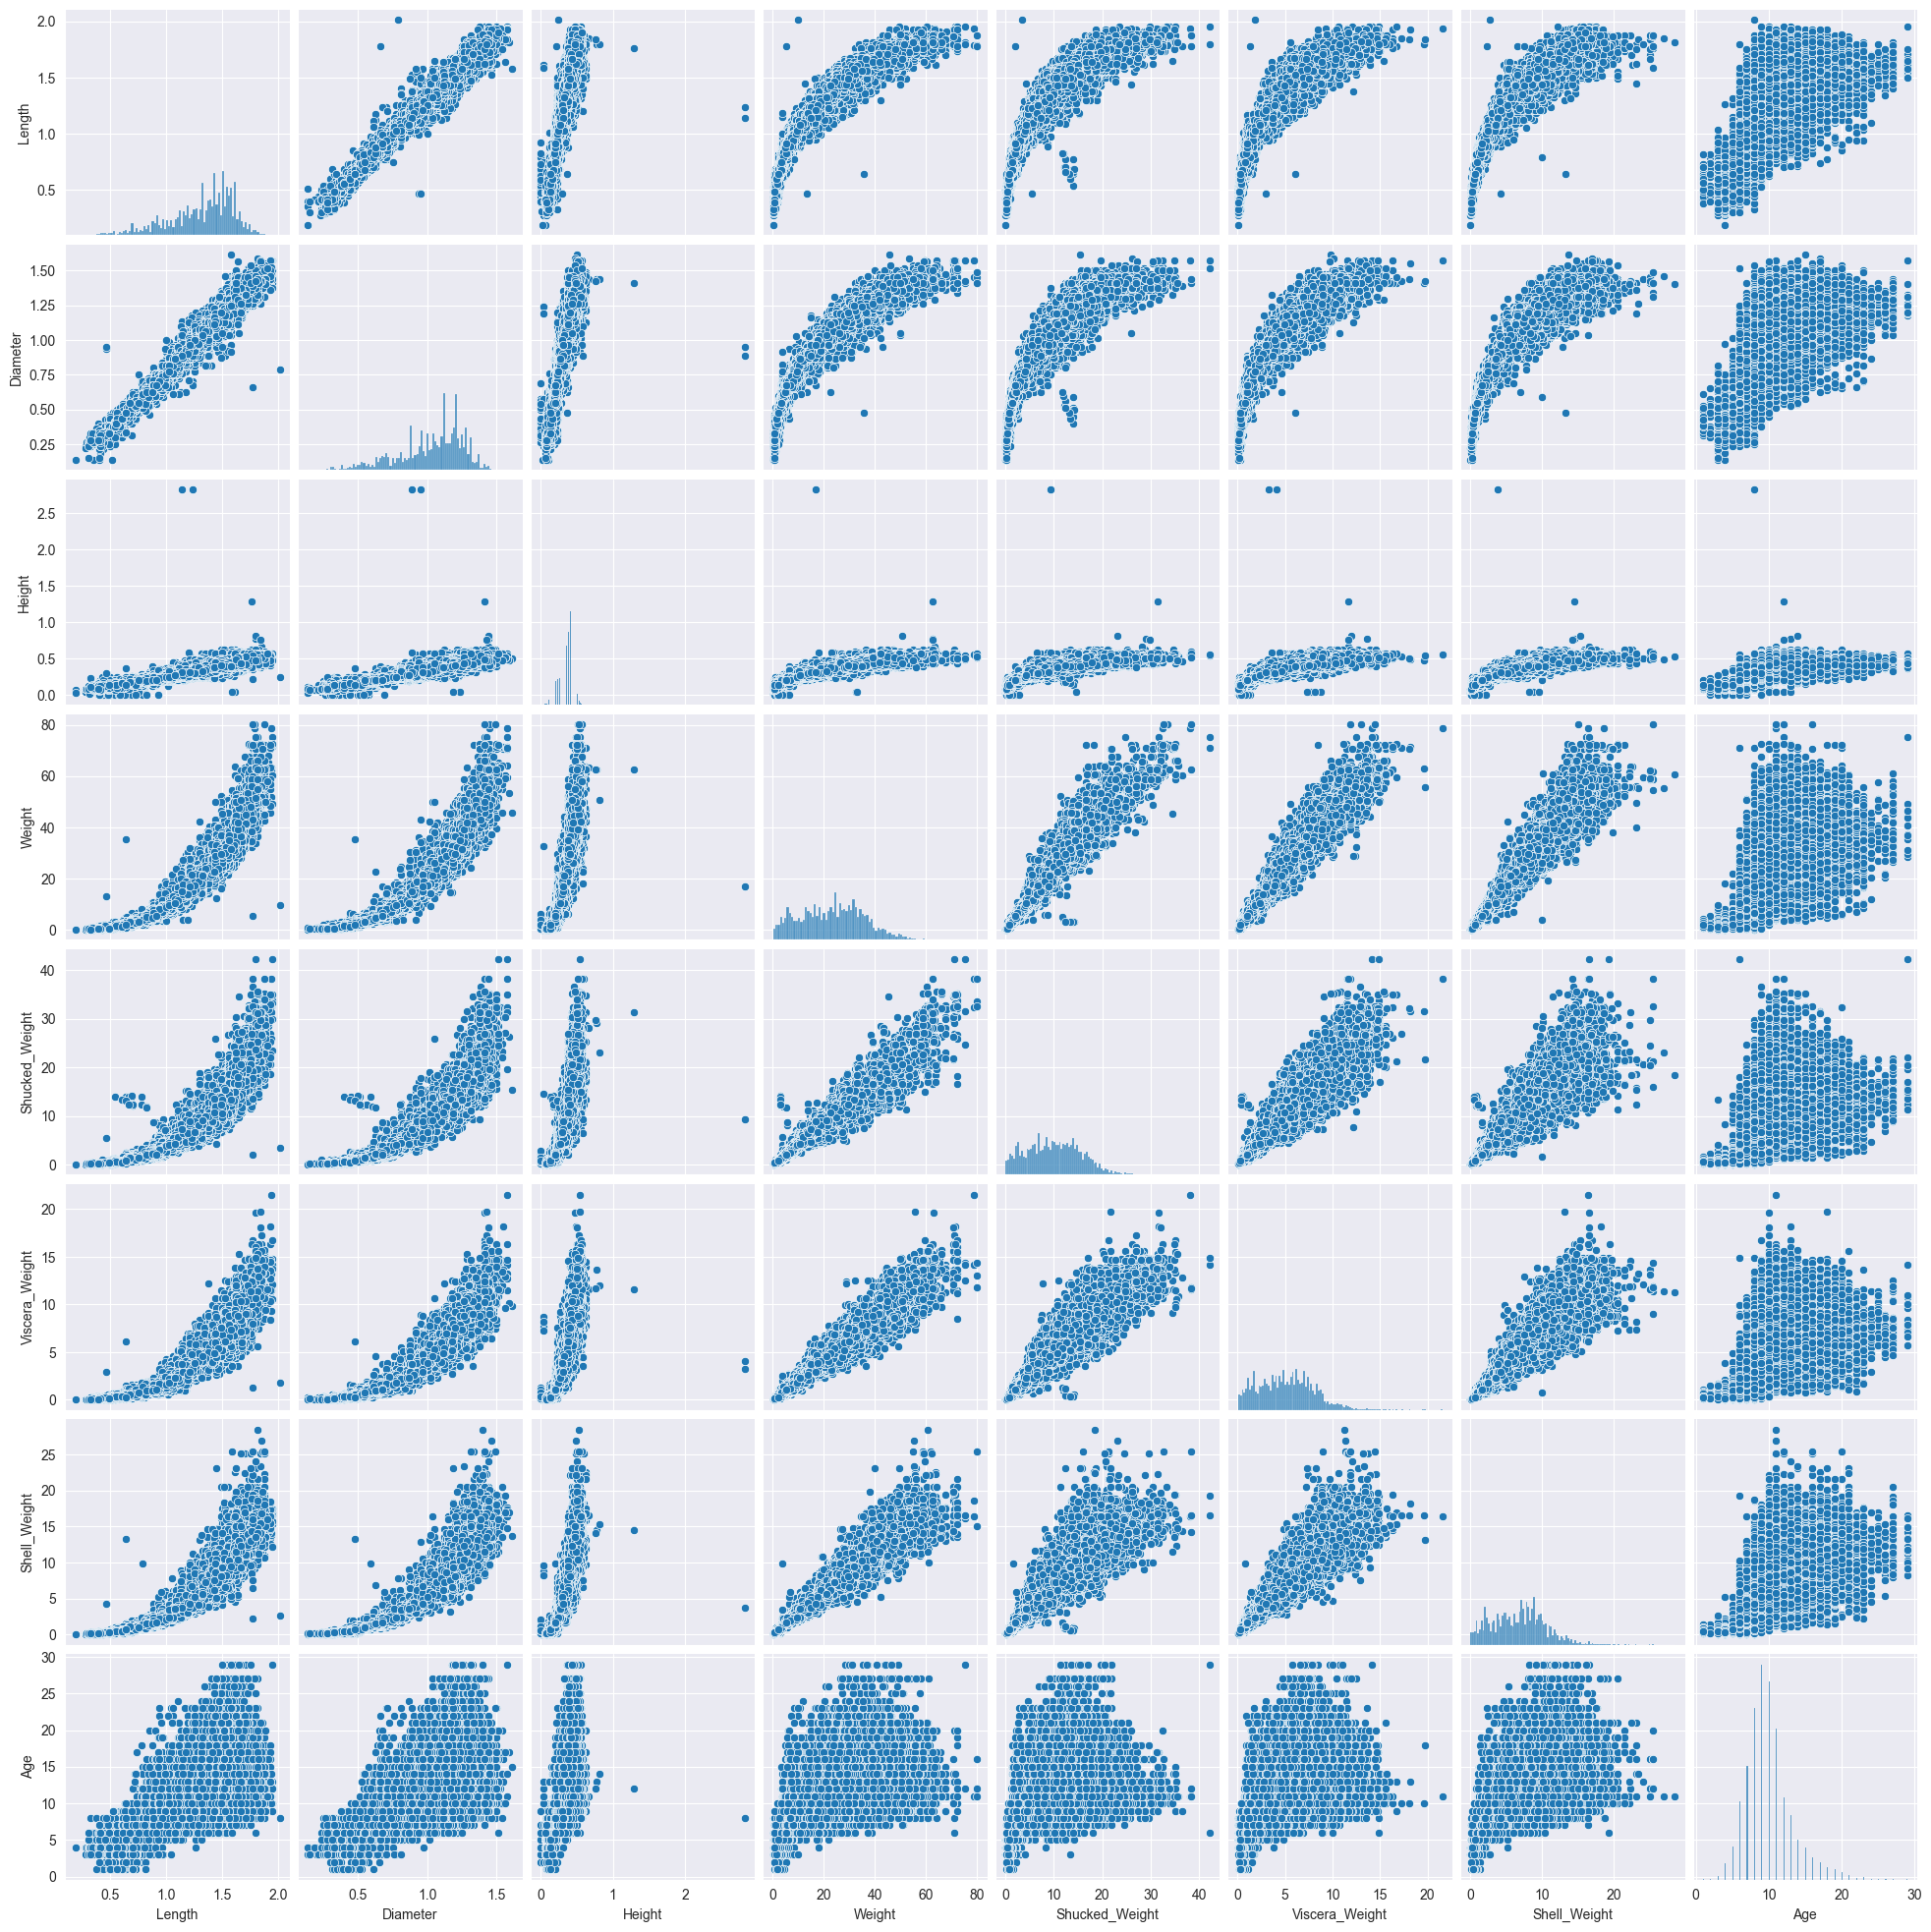

In [55]:
sns.pairplot(data=df)

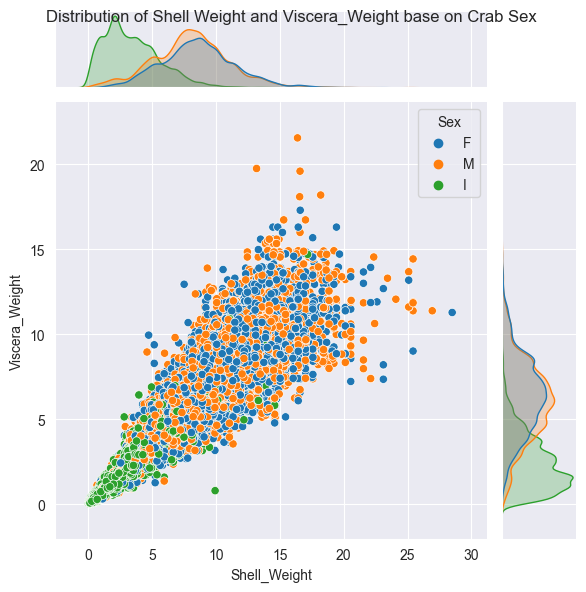

In [65]:
g = sns.jointplot(data=df,x="Shell_Weight",y="Viscera_Weight",kind='scatter',hue='Sex',hue_order=['F','M','I'])
plt.suptitle("Distribution of Shell Weight and Viscera_Weight base on Crab Sex")
sns.despine()
plt.show()

### Prepare the sample data for modelling 

In [66]:
samples = pd.get_dummies(df)
samples.head()

Length  Diameter  Height     Weight  Shucked_Weight  Viscera_Weight   
id                                                                        
0   1.5250    1.1750  0.3750  28.973189       12.728926        6.647958  \
1   1.1000    0.8250  0.2750  10.418441        4.521745        2.324659   
2   1.3875    1.1125  0.3750  24.777463       11.339800        5.556502   
3   1.7000    1.4125  0.5000  50.660556       20.354941       10.991839   
4   1.2500    1.0125  0.3375  23.289114       11.977664        4.507570   

    Shell_Weight  Age  Sex_F  Sex_I  Sex_M  
id                                          
0       8.348928    9  False   True  False  
1       3.401940    8  False   True  False  
2       6.662133    9  False  False   True  
3      14.996885   11   True  False  False  
4       5.953395    8  False   True  False

In [83]:
samples.columns

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked_Weight',
       'Viscera_Weight', 'Shell_Weight', 'Age', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [84]:
feature_names = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked_Weight',
       'Viscera_Weight', 'Shell_Weight', 'Sex_F', 'Sex_I', 'Sex_M']

In [67]:
X = samples.drop(["Age"],axis=1).values
y = samples['Age'].values

Start the Pridiction with Linear Regression model 

In [70]:
#import DicisionTree regressior
from sklearn.linear_model import LinearRegression 

#import train test split
from sklearn.model_selection import train_test_split

#import mean square error
from sklearn.metrics import mean_squared_error as MSE 

#split the data into 80% train and 20% test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)


#Intantiate the dt
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mse_dt = MSE(y_test,y_pred)

rmse_dt = mse_dt**(1/2)

print(f"Mean square value of lr model is : {mse_dt:3f}")
print(f"Root Means Square value of lr model is : {rmse_dt:.3f}")


Mean square value of lr model is : 4.515056
Root Means Square value of lr model is : 2.125


The mean square value is calculated by taking the average of the squared differences between the predicted values and the actual values. It is a measure of the overall variance or error in the model's predictions.

#### Mean square value of lr model is : 4.515056
#### Root Means Square value of lr model is : 2.125

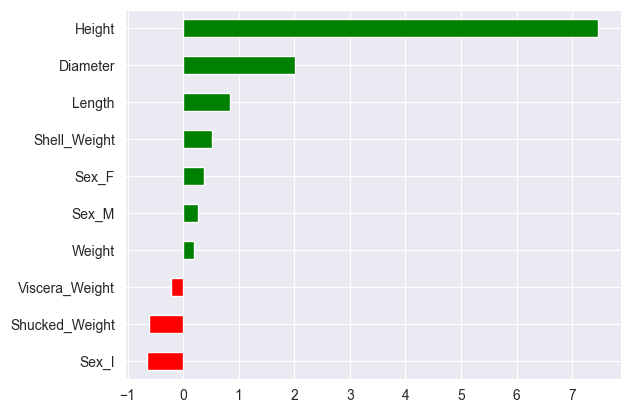

In [89]:
feature_importance = lr.coef_
#Create a pd sereies of feature importance 
importance_rf = pd.Series(feature_importance,index=feature_names)

#sort importance_rf
sorted_importance = importance_rf.sort_values()

# Determine the bar colors based on the sign of the importance values
bar_colors = ['red' if val < 0 else 'green' for val in sorted_importance]

#make a horizontal bar plot
sorted_importance.plot(kind='barh',color=bar_colors)
plt.show()

From the Above Plot we can see which feature are acting as posstive and negative impact on predicting the Age of Crab.

## Stochastic Gradient Boosting

In [91]:
#import models for utility function
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

#set seed for reproducability
SEED = 2024

#split the train and test data into 70% train and 30% test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=SEED,test_size=0.3)

#instantitate the Gradient boosting regressor
gb = GradientBoostingRegressor(n_estimators=300,max_depth=1,random_state=SEED)

#fit gb to the traininng set
gb.fit(X_train,y_train)

#predict the result and store it in y_pred
y_pred = gb.predict(X_test)

#evaludation
mse_score = MSE(y_test,y_pred)
rmse = mse_score**(1/2)

print(f"The Mean square error of gradieent boosting is {mse_score} and rmse is {rmse}")




The Mean square error of gradieent boosting is 4.522159092135267 and rmse is 2.126536877680532


Even with gradient boosting regressor we are getting similar rmse value

## Predict the crab age with the test data 

In [96]:
test_sample = pd.read_csv("test.csv",index_col=0)
test_sample.head()

Sex  Length  Diameter  Height     Weight  Shucked Weight   
id                                                               
74051   I  1.0500    0.7625  0.2750   8.618248        3.657085  \
74052   I  1.1625    0.8875  0.2750  15.507176        7.030676   
74053   F  1.2875    0.9875  0.3250  14.571643        5.556502   
74054   F  1.5500    0.9875  0.3875  28.377849       13.380964   
74055   I  1.1125    0.8500  0.2625  11.765042        5.528153   

       Viscera Weight  Shell Weight  
id                                   
74051        1.729319      2.721552  
74052        3.246018      3.968930  
74053        3.883882      4.819415  
74054        6.548735      7.030676  
74055        2.466407      3.331066

In [97]:
test_sample['Sex'] = test_sample['Sex'].astype('category')

In [98]:
test_sample = pd.get_dummies(test_sample)

In [99]:
y_sample =test_sample.values

In [101]:
## Predict the Results using our lr model

y_result = lr.predict(y_sample)

In [102]:
result = pd.DataFrame({'id':test_sample.index,'Age':y_result})
result.to_csv("Model_result.csv")